In [6]:
#Shishir Khanal
#Control Library in Julia
#https://dewdotninja.github.io/julia/control/julia_control.html

using Pkg;
Pkg.add("ControlSystems");
Pkg.add("Plots");
begin
    using ControlSystems, Plots;
end

   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed GR_jll ─────────────────────── v0.69.1+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed EarCut_jll ─────────────────── v2.2.4+0
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed PlotUtils ──────────────────── v1.3.2
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3
   Installed RecipesPipeline ────────────── v0.4.1
   Installed Cairo_jll ──────────────────── v1.16.1+1
   Installed Fontconfig_jll ─────────────── v2.13.93+0
   Installed Xorg_

Precompiling project...
  ✓ TensorCore
  ✓ Extents
  ✓ IniFile
  ✓ URIs
  ✓ UnicodeFun
  ✓ Scratch
  ✓ PCRE2_jll
  ✓ MbedTLS
  ✓ Graphite2_jll
  ✓ StructArrays
  ✓ OpenSSL_jll
  ✓ Libmount_jll
  ✓ Xorg_libXau_jll
  ✓ libpng_jll
  ✓ Bzip2_jll
  ✓ Latexify
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ libfdk_aac_jll
  ✓ EarCut_jll
  ✓ Xorg_libXdmcp_jll
  ✓ JpegTurbo_jll
  ✓ Ogg_jll
  ✓ LERC_jll
  ✓ x265_jll
  ✓ x264_jll
  ✓ LZO_jll
  ✓ libaom_jll
  ✓ Expat_jll
  ✓ Zstd_jll
  ✓ Xorg_xtrans_jll
  ✓ Opus_jll
  ✓ Wayland_protocols_jll
  ✓ Libiconv_jll
  ✓ Libgpg_error_jll
  ✓ Libffi_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Libuuid_jll
  ✓ FriBidi_jll
  ✓ GeoInterface
  ✓ FreeType2_jll
  ✓ libvorbis_jll
  ✓ Libtiff_jll
  ✓ Libgcrypt_jll
  ✓ XML2_jll
  ✓ XSLT_jll
  ✓ Fontconfig_jll
  ✓ ColorVectorSpace
  ✓ HTTP
  ✓ Xorg_libxcb_jll
  ✓ Wayland_jll
  ✓ Gettext_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll
  ✓ Glib_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ 

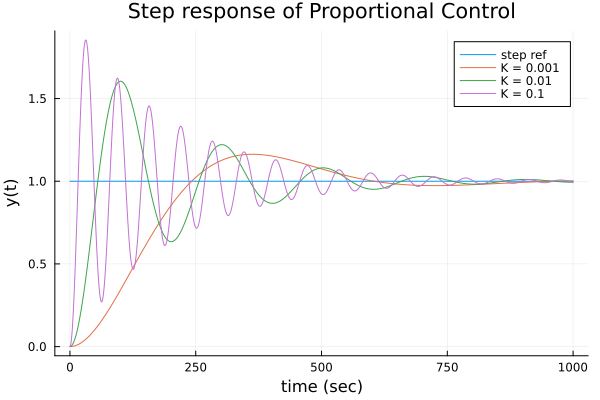

In [7]:
#Robot joint driven by DC Motor

begin
    s = tf("s")
    P = 1/(10s^2 + 0.1s)
    K = [0.001, 0.01, 0.1]
    
    #Forward Path: K*P and Unit Feedback
    sys1 = feedback(K[1]*P)
    sys2 = feedback(K[2]*P)
    sys3 = feedback(K[3]*P)

    tvec1 = collect(Float64, 0:1:1000)
    y1,t1,x1 = step(sys1, tvec1)
    y2,t2,x2 = step(sys2, tvec1)
    y3,t3,x3 = step(sys3, tvec1)
    r = ones(size(t1))

    y1 = dropdims(y1, dims=1)
    y2 = dropdims(y2, dims=1)
    y3 = dropdims(y3, dims=1)

    plot(t1, r, label="step ref")
    plot!(t1,y1, label="K = 0.001")
    plot!(t2,y2, label="K = 0.01")
    plot!(t3,y3, xlabel="time (sec)", ylabel="y(t)", title="Step response of Proportional Control", label="K = 0.1")
end

In [8]:
#First order Lead-Lag Compensator for the plant with unity feedback
# C(s) = K*(s + z) /(s + p) 
# K = 20000, z = 0.01, p = 100

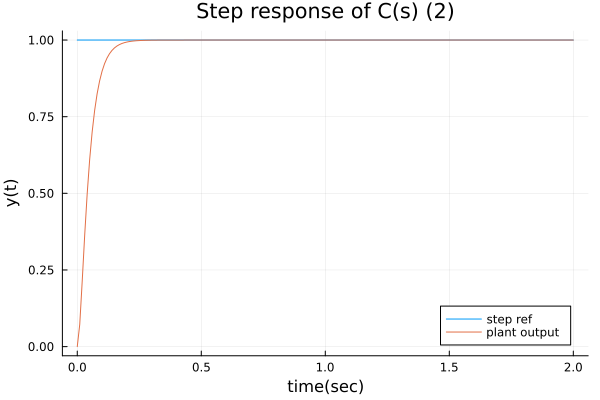

In [9]:
begin
    C = 20000 * (s + 0.01) / (s + 100)
    L = C * P
    sys = feedback(L)
    tvec = collect(Float64, 0:0.01:2)
    y,t,x = step(sys, tvec)
    rc = ones(size(t))
    plot(t, rc, label="step ref")
    #Convert matrix to vector
    y = dropdims(y, dims=1)
    plot!(t,y, label="plant output", xlabel="time(sec)", ylabel="y(t)", 
        title="Step response of C(s) (2)", legend=:bottomright)
end
#Step response settles within o.2 secs

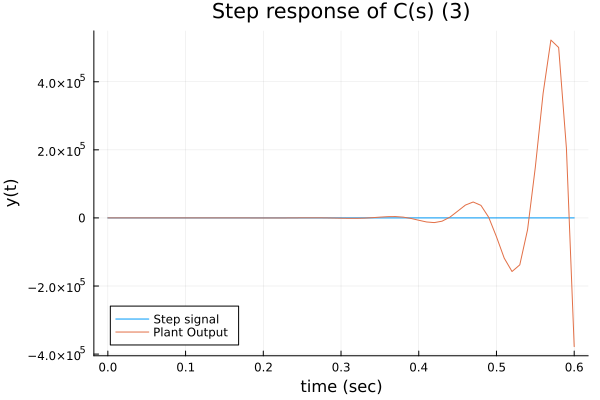

In [10]:
#Bad lead-lag controller: pole close to origin and zero far from origin
#Response is unstable
begin
    Cb = 20000 * (s + 100) / (s + 0.01)
    Lb = Cb*P
    sysb = feedback(Lb)
    tvecb = collect(Float64, 0:0.01:0.6)
    yb,tb,xb = step(sysb, tvecb)
    yb = dropdims(yb, dims=1)
    inputsig = ones(size(tb))
    plot(tb, inputsig, label="Step signal")
    plot!(tb, yb, label="Plant Output", xlabel="time (sec)", ylabel="y(t)", title="Step response of C(s) (3)", legend=:bottomleft)
end

In [11]:
#Closed-Loop Stability
t_yr = feedback(C*P)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
           20000.0s + 200.0
--------------------------------------
10.0s^3 + 1000.1s^2 + 20010.0s + 200.0

Continuous-time transfer function model

In [13]:
T_yr_minreal = minreal(t_yr)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
                     2000.0
-------------------------------------------------
1.0s^2 + 100.00000000000009s + 2000.0000000000018

Continuous-time transfer function model

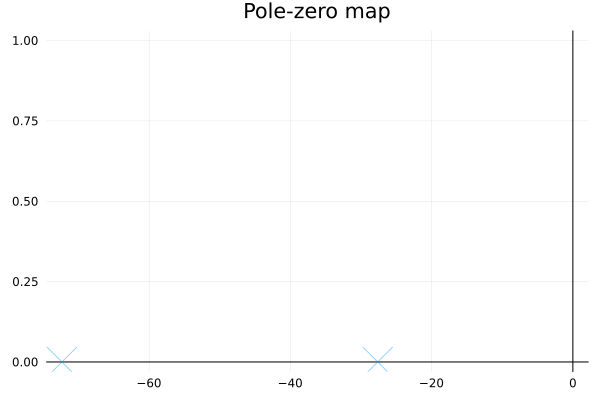

In [14]:
pzmap(T_yr_minreal)

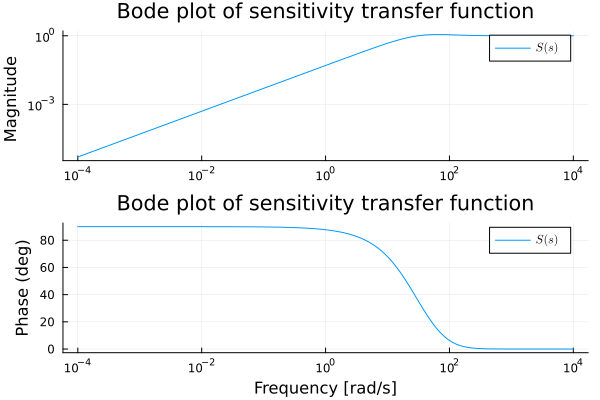

In [16]:
#Sensitivity Transfer Function with respect to output disturbance
begin
    S = 1/(1 + L)
    bodeplot(S; title="Bode plot of sensitivity transfer function", label="\$S(s)\$")
end